# Assignment-4 Simple Linear Regression-1

In [24]:
#import libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
def min_max_skew(series):
    cmin = np.around(np.min(series), 2)
    cmax = np.around(np.max(series), 2)
    skew = np.around(stats.skew(series), 2)
    
    return cmin, cmax, skew

In [4]:
def transform_skew(series):
    # Given Series
    series_min, series_max, series_skew = min_max_skew(series)
    
    # Log transformation
    log_series = np.log(series)
    log_min, log_max, log_skew = min_max_skew(log_series)
    
    # Square root transformation
    root_series = np.sqrt(series)
    root_min, root_max, root_skew = min_max_skew(root_series)
    
    # Reciprocal transformation
    reciprocal_series = 1 / series
    reciprocal_min, reciprocal_max, reciprocal_skew = min_max_skew(reciprocal_series)
    
    # Box-Cox transformation
    boxcox_series = stats.boxcox(series)[0]
    boxcox_min, boxcox_max, boxcox_skew = min_max_skew(boxcox_series)
    
    # Building Min, Max and Transformed values DataFrame
    df_min_max_skew = pd.DataFrame({
        'Tranformation': ['Given Series', 'Log', 'Square root', 'Reciprocal', 'Box-Cox'],
        'Min': [series_min, log_min, root_min, reciprocal_min, boxcox_min],
        'Max': [series_max, log_max, root_max, reciprocal_max, boxcox_max],
        'Skew': [series_skew, log_skew, root_skew, reciprocal_skew, boxcox_skew]
    })
    
    return df_min_max_skew

In [14]:
#import dataset
dataset=pd.read_csv("C:/Users/dell/Downloads/delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Data pre-processing

In [16]:
#renaming columns
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [17]:
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [18]:
dataset.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [19]:
# Calculating skewness of all variables
dataset.skew()

delivery_time    0.352390
sorting_time     0.047115
dtype: float64

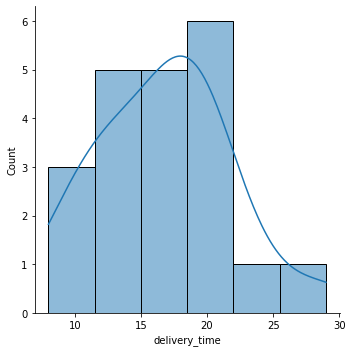

In [32]:
sns.displot(dataset['delivery_time'], kde=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

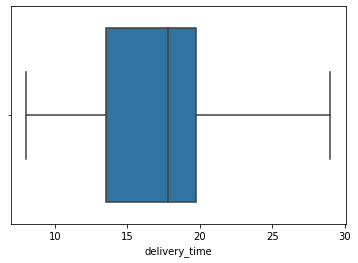

In [34]:
sns.boxplot(dataset['delivery_time'])

In [25]:
# Performing different transformations
transform_skew(dataset['delivery_time'])

,Tranformation,Min,Max,Skew
0,Given Series,8.00,29.00,0.33
1,Log,2.08,3.37,-0.42
2,Square root,2.83,5.39,-0.06
3,Reciprocal,0.03,0.12,1.08
4,Box-Cox,3.87,9.68,-0.02


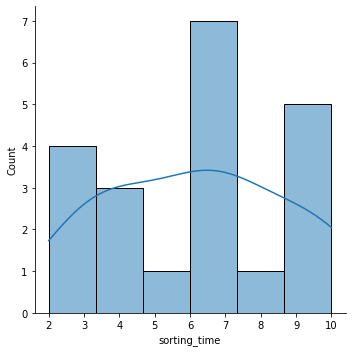

In [31]:
sns.displot(dataset['sorting_time'], kde=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

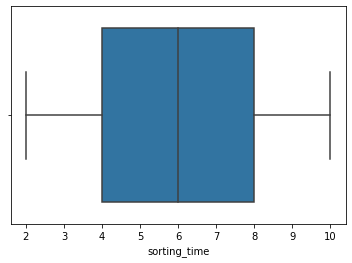

In [33]:
sns.boxplot(dataset['sorting_time'])

In [30]:
# Performing different transformations
transform_skew(dataset['sorting_time'])

,Tranformation,Min,Max,Skew
0,Given Series,2.00,10.00,0.04
1,Log,0.69,2.30,-0.56
2,Square root,1.41,3.16,-0.24
3,Reciprocal,0.10,0.50,1.34
4,Box-Cox,0.89,5.72,-0.12


In [35]:
#Correlation
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


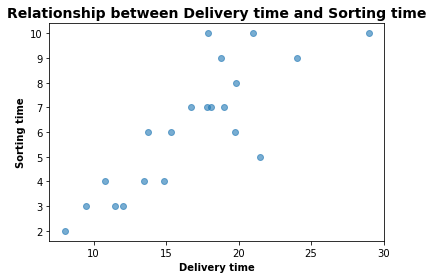

In [37]:
# Scatter plot between delivery time and sorting time
plt.figure(figsize=(6,4))
plt.scatter(dataset['delivery_time'],
            dataset['sorting_time'],
            alpha=0.6)
plt.title('Relationship between Delivery time and Sorting time', fontsize=14, weight='bold')
plt.xlabel('Delivery time', weight='bold')
plt.ylabel('Sorting time', weight='bold')
plt.show()

# Simple Linear Regression

In [22]:
#Model Building
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

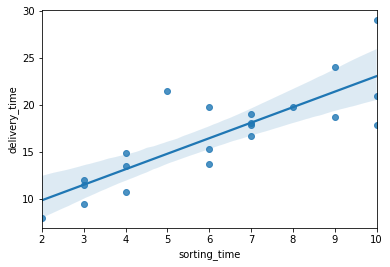

In [23]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'],data=dataset)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        21:07:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Model Prediction
new_data=pd.Series([7,9])
new_data

0    7
1    9
dtype: int64

In [19]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,9


In [20]:
model.predict(data_pred)

0    18.125873
1    21.423913
dtype: float64